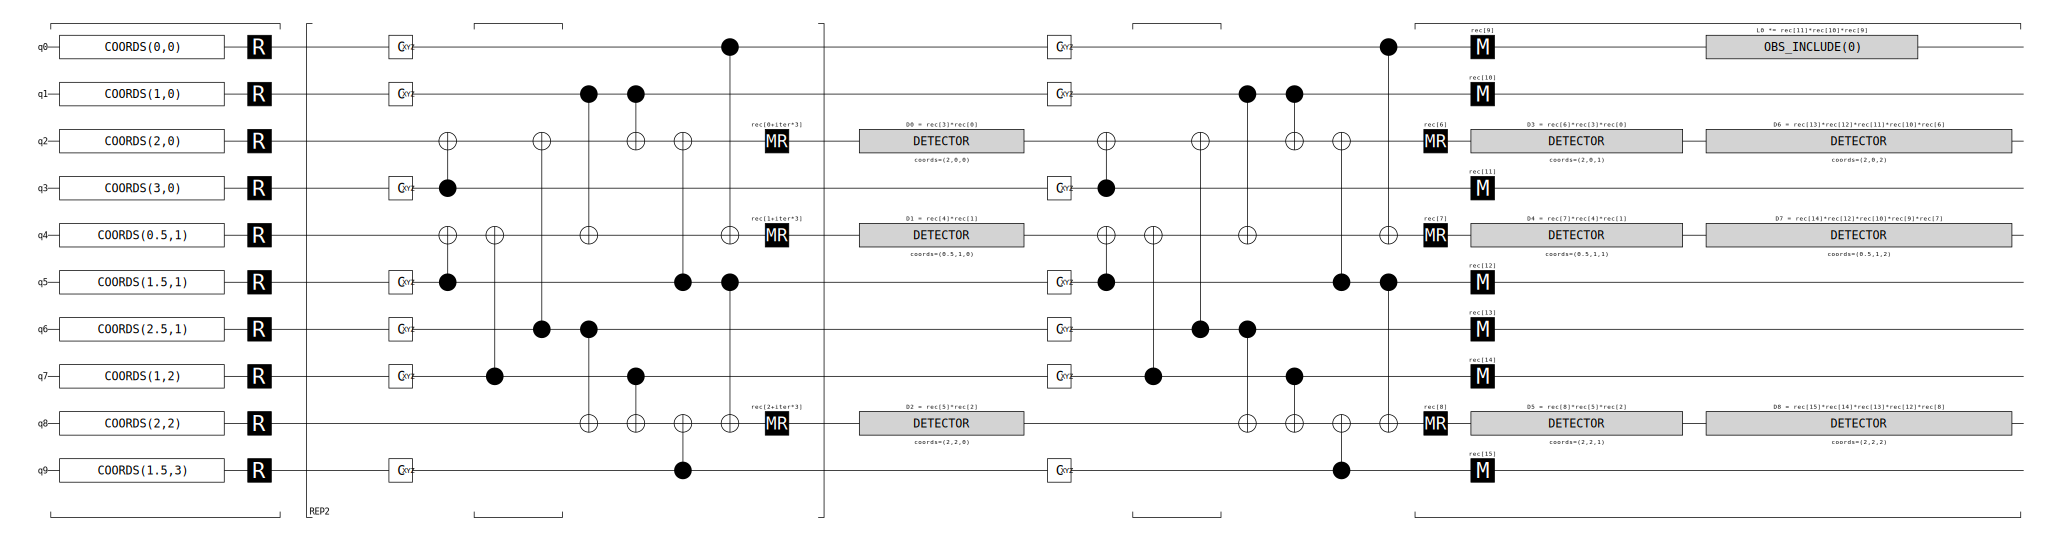

In [1]:
import stim

color_code_circuit = stim.Circuit.generated(
    "color_code:memory_xyz",
    rounds=3,
    distance=3,
    after_clifford_depolarization=0.001,
    after_reset_flip_probability=0.001,
    before_measure_flip_probability=0.001,
    before_round_data_depolarization=0.001)

color_code_circuit.without_noise().diagram('timeline-svg')

In [2]:
import sys
import numpy as np

sys.path.append("../src")
from circuit import generate_css_memory_experiment, load_schedule
from helpers import get_parity_matrices, CODE_CONFIGS
import itertools

Hx, Hz = get_parity_matrices(15, CODE_CONFIGS["triorthogonal"])
Hx_tet, Hz_tet = get_parity_matrices(3, CODE_CONFIGS["tetrahedral"])

# Function to check if Hx can become Hx_tet by permutating columns
def are_column_permutations(mat1, mat2):
    if mat1.shape != mat2.shape:
        return False
    
    # Sort columns of both matrices to make them order-independent
    # We turn columns into tuples to sort them, or use lexsort
    
    # 1. Transpose so rows become columns (easier to sort rows in numpy usually if we view as void)
    # or just sort column-wise.
    
    cols1 = mat1.T
    cols2 = mat2.T
    
    # Convert rows (original columns) to byte strings or tuples for easy sorting/comparison
    sorted_cols1 = sorted([tuple(c) for c in cols1])
    sorted_cols2 = sorted([tuple(c) for c in cols2])
    
    return sorted_cols1 == sorted_cols2

print(f"Hx and Hx_tet are column permutations of each other: {are_column_permutations(Hx, Hx_tet)}")
print(f"Hz and Hz_tet are column permutations of each other: {are_column_permutations(Hz, Hz_tet)}")

Hx and Hx_tet are column permutations of each other: True
Hz and Hz_tet are column permutations of each other: False


In [23]:
print(Hx)
print("----------------------------------")
print(Hz)

[[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [0 0 0 1 1 1 1 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]]
----------------------------------
[[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [0 0 0 1 1 1 1 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 1 0 0]]
